# Numerical Exercise 03

In [53]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math


Solid : Initial temperature needed for target temperature 0.8 is 1.54
Check: 0.8
Liquid : Initial temperature needed for target temperature 1.1 is 1.97
Check: 1.1
Gas : Initial temperature needed for target temperature 1.2 is 0.95
Check: 1.2


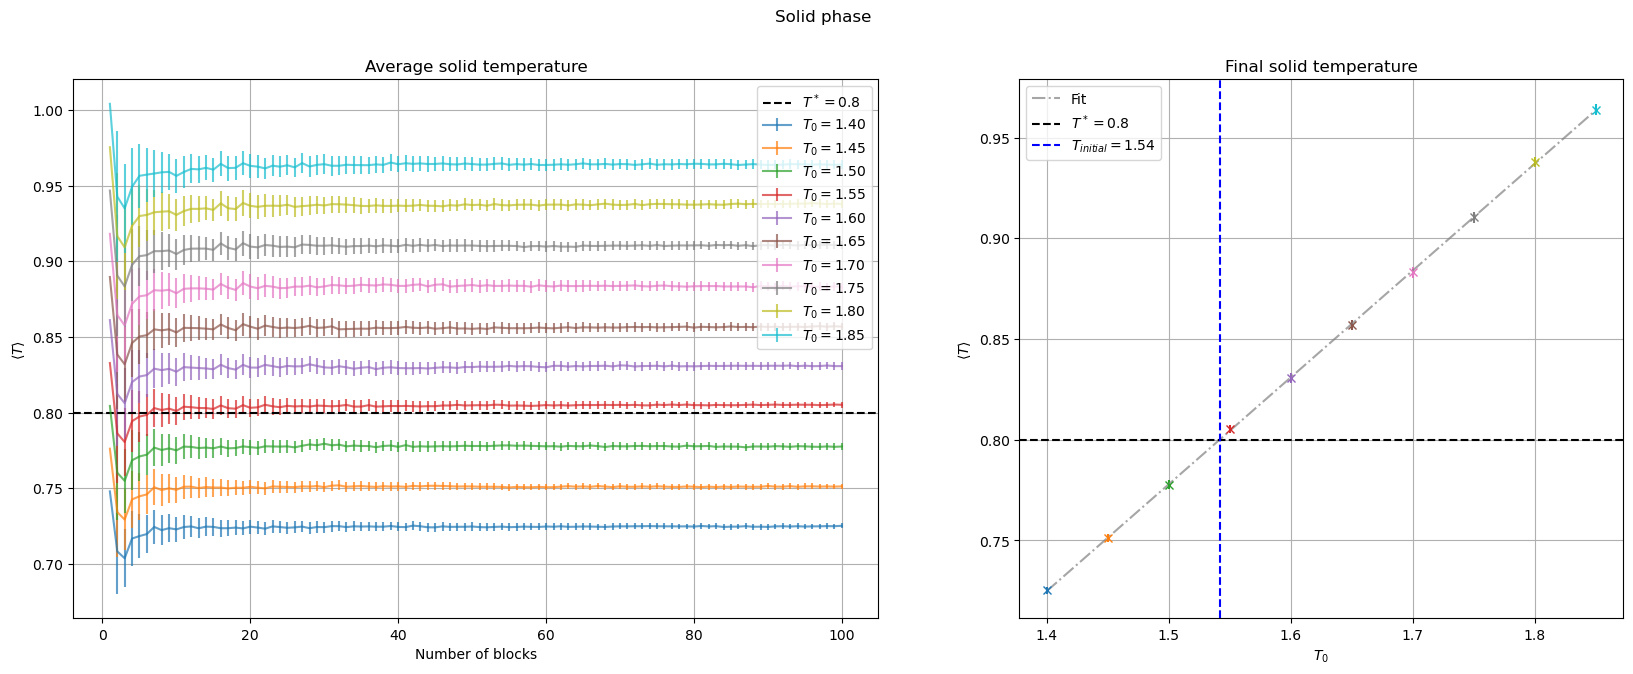

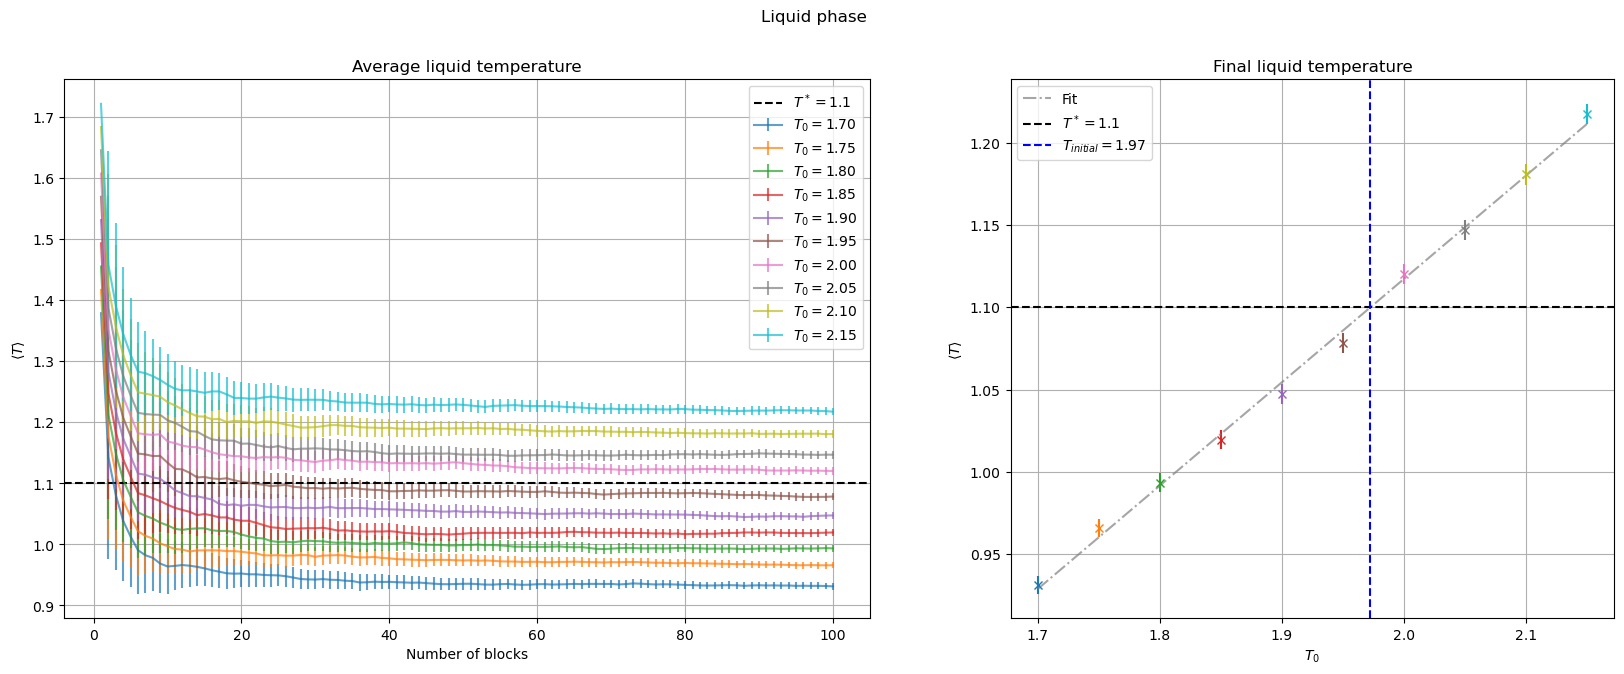

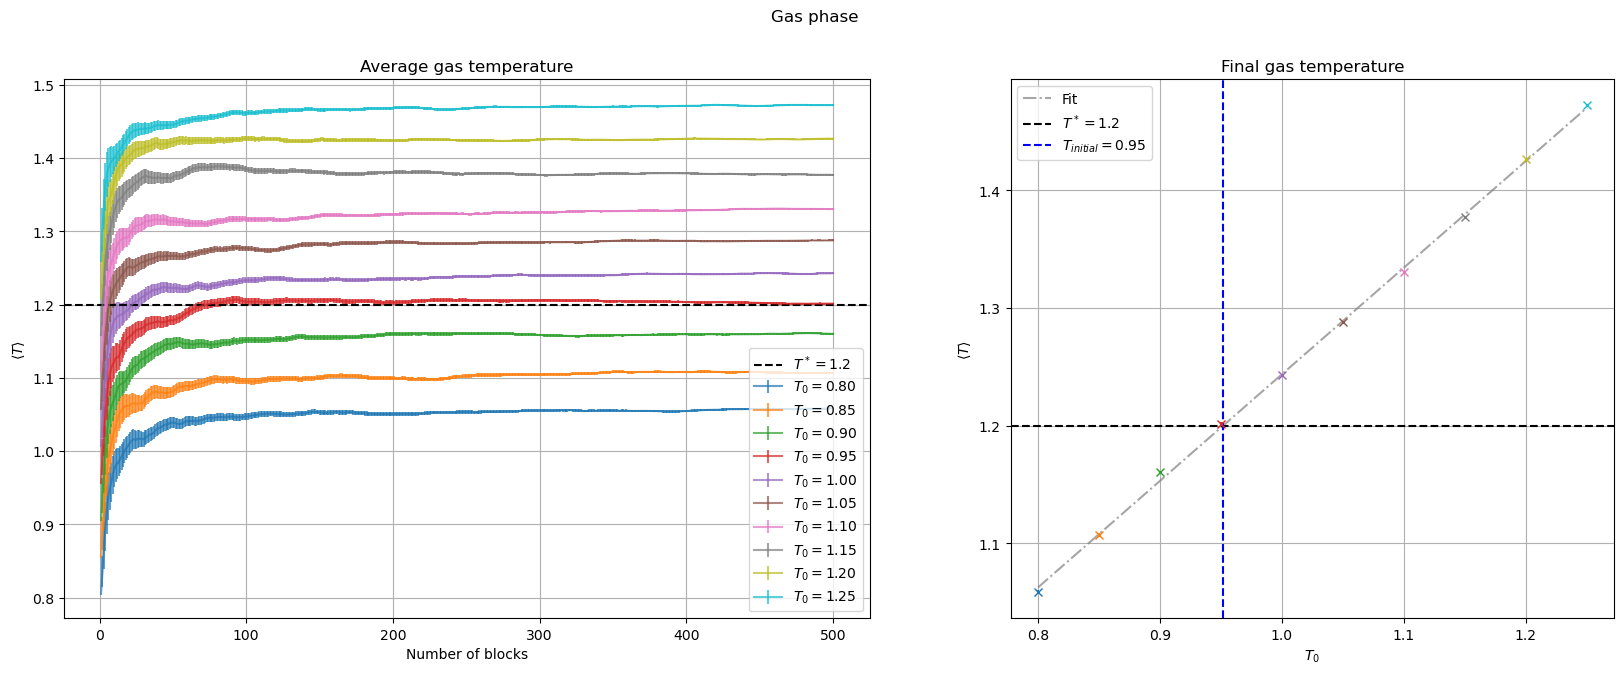

In [54]:

prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']

names = ["solid", "liquid", "gas"]
target_temp = [0.8, 1.1, 1.2]
t0 = np.zeros(10)
avgs = np.zeros(10)
fit_line = []
for name in names:
    fig, graphs = plt.subplots(1,2, gridspec_kw = {"width_ratios": [2, 1.5]}, figsize=(20, 7))
    fig.suptitle(name.capitalize()+" phase")
    for i in range(10):
        starting_temp, n_throws, blck_avg, cum_avg, errors = np.loadtxt("../data/ex04_eq_"+name+"_"+str(i)+".dat", unpack=True, usecols=(0,1,2,3,4))
        label = r"$T_{initial}={temp:.2f}$".format(initial="{0}", temp=starting_temp[1]) 
        graphs[0].errorbar(n_throws, cum_avg, yerr=errors, label=label, color=colors[i], alpha=0.7)
        graphs[1].errorbar(starting_temp[1], cum_avg[-1:], yerr=errors[-1:], marker='x')
        t0[i] = starting_temp[1]
        avgs[i] = cum_avg[-1:]
    fit_coeffs = np.polyfit(t0, avgs, 1)
    fit_line.append(np.poly1d(fit_coeffs))
    target_label = r"$T^*={temp}$".format(temp=str(target_temp[names.index(name)]))
    graphs[1].plot(t0, fit_line[names.index(name)](t0), color='gray', alpha = 0.7 , linestyle='-.', label="Fit")
    graphs[0].axhline(y=target_temp[names.index(name)], color='black', linestyle='--', label=target_label)
    graphs[1].axhline(y=target_temp[names.index(name)], color='black', linestyle='--', label=target_label)
    intial_temp = (fit_line[names.index(name)] - target_temp[names.index(name)]).roots
    graphs[1].axvline(x=intial_temp[0], color='b', linestyle='--', label=r"$T_{initial}" + "={temp:.2f}$".format(temp=intial_temp[0]))
    graphs[0].set_title("Average "+name+" temperature")
    graphs[0].set_xlabel('Number of blocks')
    graphs[0].set_ylabel(r"$\langle T \rangle$")
    graphs[0].grid(True)
    graphs[0].legend()
    graphs[1].set_title("Final "+name+" temperature")
    graphs[1].set_xlabel(r"$T_{0}$")
    graphs[1].set_ylabel(r"$\langle T \rangle$")
    graphs[1].grid(True)
    graphs[1].legend()

for target in target_temp:
    intial_temp = (fit_line[target_temp.index(target)] - target).roots
    name = names[target_temp.index(target)].capitalize()
    print("{2} : Initial temperature needed for target temperature {0} is {1:.2f}".format(target, intial_temp[0], name))
    print("Check: {0}".format(fit_line[target_temp.index(target)](intial_temp[0])))


plt.show()




Solid : Initial temperature needed for target temperature 0.8 is 1.54
Check: 0.8
Liquid : Initial temperature needed for target temperature 1.1 is 1.99
Check: 1.1
Gas : Initial temperature needed for target temperature 1.2 is 0.95
Check: 1.2


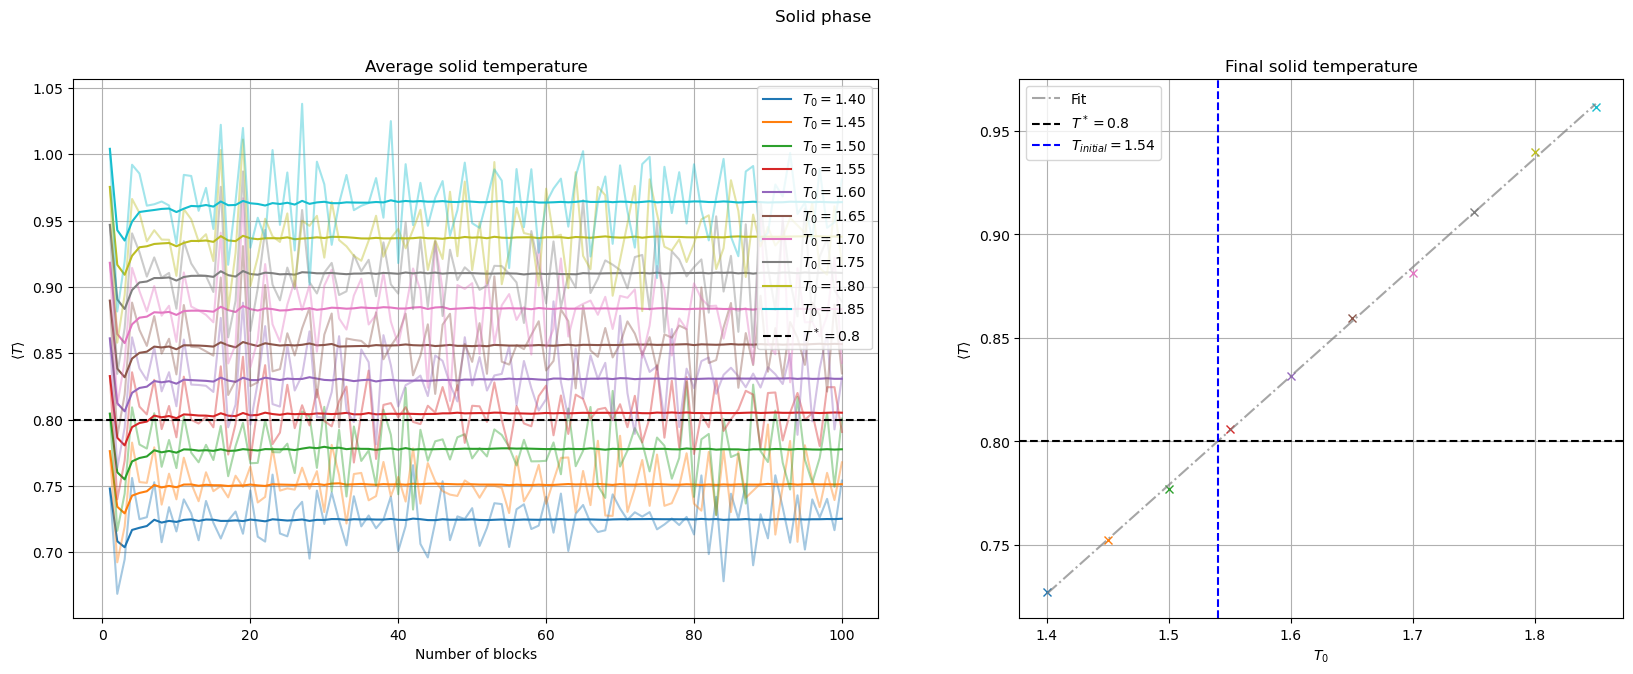

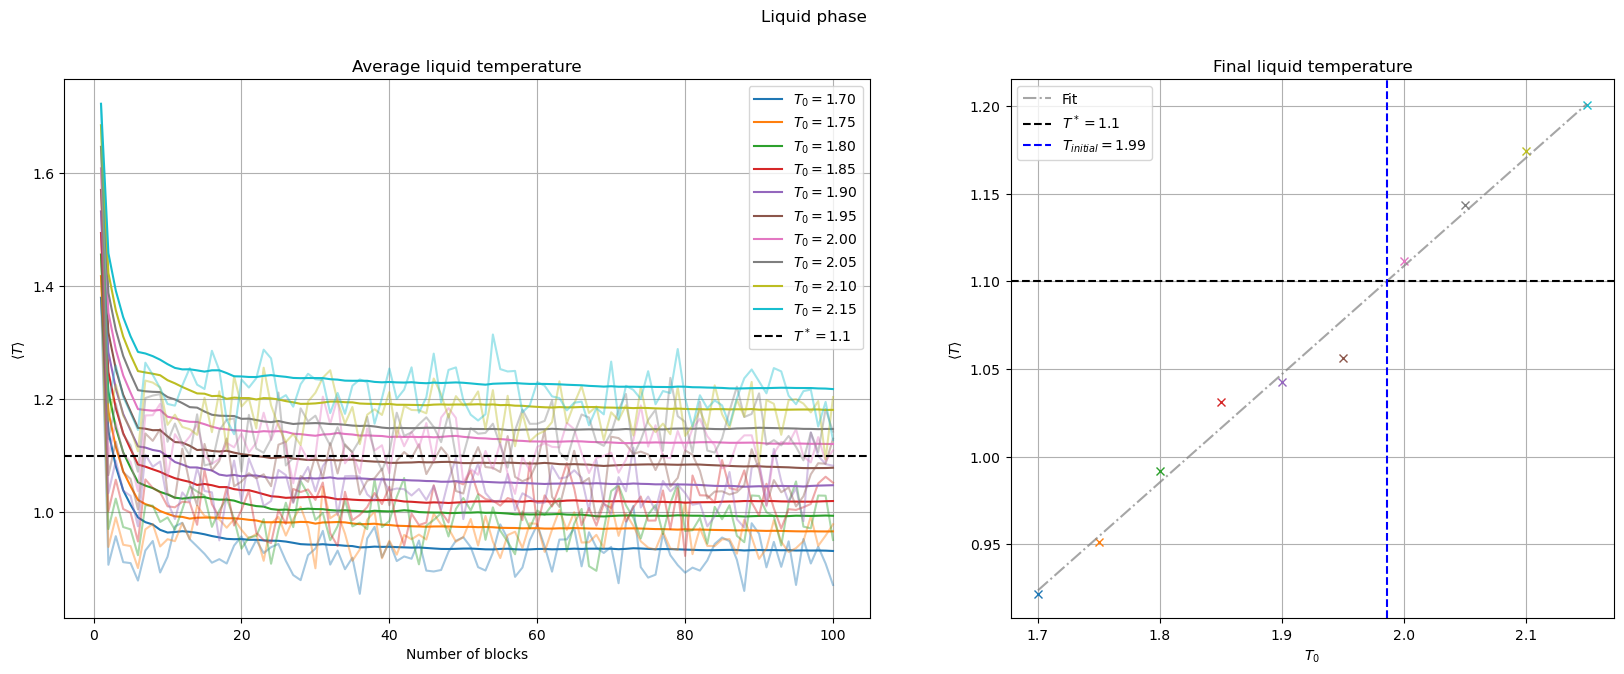

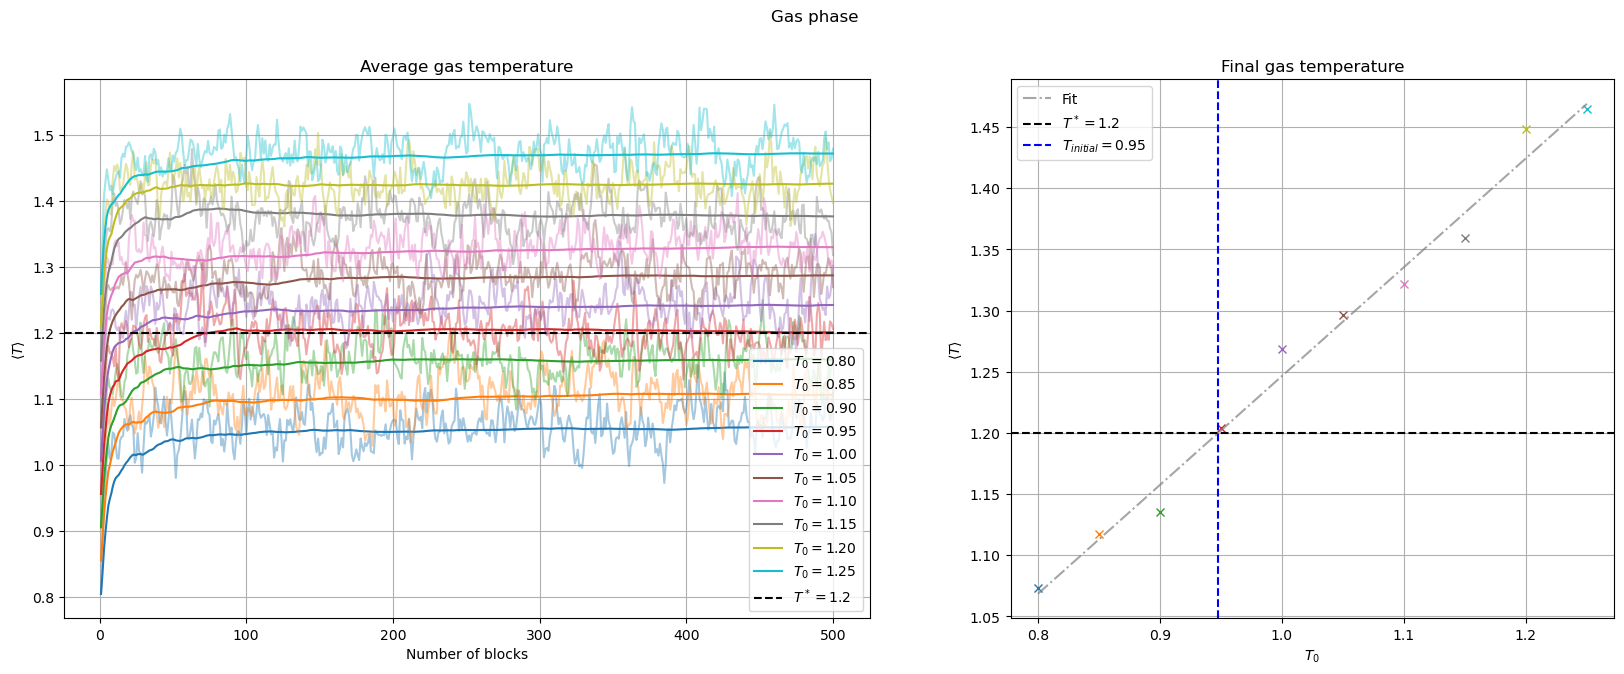

In [55]:

prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']

names = ["solid", "liquid", "gas"]
target_temp = [0.8, 1.1, 1.2]
t0 = np.zeros(10)
avgs = np.zeros(10)
fit_line = []
for name in names:
    fig, graphs = plt.subplots(1,2, gridspec_kw = {"width_ratios": [2, 1.5]}, figsize=(20, 7))
    fig.suptitle(name.capitalize()+" phase")
    for i in range(10):
        starting_temp, n_throws, blck_avg, cum_avg, errors = np.loadtxt("../data/ex04_eq_"+name+"_"+str(i)+".dat", unpack=True, usecols=(0,1,2,3,4))
        label = r"$T_{initial}={temp:.2f}$".format(initial="{0}", temp=starting_temp[1]) 
        graphs[0].plot(n_throws, blck_avg, color=colors[i] , alpha=0.4)
        graphs[0].plot(n_throws, cum_avg, label=label, color=colors[i])
        graphs[1].plot(starting_temp[1], np.mean(blck_avg[-20:]), marker='x')
        t0[i] = starting_temp[1]
        avgs[i] = np.mean(blck_avg[-20:])
    fit_coeffs = np.polyfit(t0, avgs, 1)
    fit_line.append(np.poly1d(fit_coeffs))
    target_label = r"$T^*={temp}$".format(temp=str(target_temp[names.index(name)]))
    graphs[1].plot(t0, fit_line[names.index(name)](t0), color='gray', alpha = 0.7 , linestyle='-.', label="Fit")
    graphs[0].axhline(y=target_temp[names.index(name)], color='black', linestyle='--', label=target_label)
    graphs[1].axhline(y=target_temp[names.index(name)], color='black', linestyle='--', label=target_label)
    intial_temp = (fit_line[names.index(name)] - target_temp[names.index(name)]).roots
    graphs[1].axvline(x=intial_temp[0], color='b', linestyle='--', label=r"$T_{initial}" + "={temp:.2f}$".format(temp=intial_temp[0]))
    graphs[0].set_title("Average "+name+" temperature")
    graphs[0].set_xlabel('Number of blocks')
    graphs[0].set_ylabel(r"$\langle T \rangle$")
    graphs[0].grid(True)
    graphs[0].legend()
    graphs[1].set_title("Final "+name+" temperature")
    graphs[1].set_xlabel(r"$T_{0}$")
    graphs[1].set_ylabel(r"$\langle T \rangle$")
    graphs[1].grid(True)
    graphs[1].legend()

for target in target_temp:
    intial_temp = (fit_line[target_temp.index(target)] - target).roots
    name = names[target_temp.index(target)].capitalize()
    print("{2} : Initial temperature needed for target temperature {0} is {1:.2f}".format(target, intial_temp[0], name))
    print("Check: {0}".format(fit_line[target_temp.index(target)](intial_temp[0])))




plt.show()


